In [9]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

IMAGE = './ADNI/002_S_0413/MPR____N3__Scaled/2006-05-19_16_17_47.0/I40657/ADNI_002_S_0413_MR_MPR____N3__Scaled_Br_20070216232854688_S14782_I40657.nii'

# load in sitk format (SimpleITK)
sitk_image = sitk.ReadImage(IMAGE)
# transform into a numpy array
img = sitk.GetArrayFromImage(sitk_image)

In [20]:
import csv

# Ex: {'037_S_0303': 'CN'}
patient_groups = {}
with open("./ADNI1_Annual_2_Yr_3T_12_05_2022.csv", 'r') as file:
    csvreader = csv.reader(file)
    next(csvreader)
    for row in csvreader:
        if(row[2] == 'MCI'): continue
        patient_groups[row[1]] = row[2]

In [71]:
IMG_SHAPE = (100, 132, 132)

def resample_img(itk_image, out_spacing=[2.0, 2.0, 2.0]):
    original_spacing = itk_image.GetSpacing()
    original_size = itk_image.GetSize()

    out_size = [
        int(np.round(original_size[0] *
            (original_spacing[0] / out_spacing[0]))),
        int(np.round(original_size[1] *
            (original_spacing[1] / out_spacing[1]))),
        int(np.round(original_size[2] * (original_spacing[2] / out_spacing[2])))]

    resample = sitk.ResampleImageFilter()
    resample.SetOutputSpacing(out_spacing)
    resample.SetSize(IMG_SHAPE)
    resample.SetOutputDirection(itk_image.GetDirection())
    resample.SetOutputOrigin(itk_image.GetOrigin())
    resample.SetTransform(sitk.Transform())
    resample.SetDefaultPixelValue(itk_image.GetPixelIDValue())

    resample.SetInterpolator(sitk.sitkBSpline)

    return resample.Execute(itk_image)


In [82]:
IMG_2D_SHAPE = (IMG_SHAPE[0] * 4, IMG_SHAPE[1] * 4)

def slices_matrix_2D(img):
    image_2D = np.empty(IMG_2D_SHAPE)

    TOP = 90
    STEP = 4
    N_CUTS = 16

    cut_it = TOP
    row_it = 0
    col_it = 0

    for cutting_time in range(N_CUTS):
        cut = img[:IMG_SHAPE[0], :IMG_SHAPE[1], cut_it]
        cut_it -= STEP

        if cutting_time in [4, 8, 12]:
            row_it = 0
            col_it += cut.shape[1]

        for i in range(cut.shape[0]):
            for j in range(cut.shape[1]):
                image_2D[i + row_it, j + col_it] = cut[i, j]
        row_it += cut.shape[0]

    return image_2D


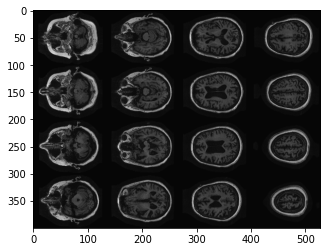

1


KeyboardInterrupt: 

In [97]:
import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

rootdir = '/home/marlon/escola/faculdade/6/padroes/ADNI'

data = []
labels = []

count = 0
for subdir, dirs, files in os.walk(rootdir):
    relative_path = subdir[len(rootdir):]
    if (len(relative_path) == 0):
        continue
    patient = relative_path.rsplit('/')[1]

    if patient in patient_groups:
        group = patient_groups[patient]
        # print(group)
        for file in files:
            file_path = os.path.join(subdir, file)
            sitk_image = sitk.ReadImage(file_path)
            sitk_image = resample_img(sitk_image)
            img = sitk.GetArrayFromImage(sitk_image)
            img = slices_matrix_2D(img)
            # print(os.path.join(subdir, file))
            # print(img.shape)
            plt.imshow(img, cmap='gray')
            plt.show()
            # data.append(img)
            # labels.append(group)

            count+=1
            print(count)

with open('data.npy', 'wb') as f:
    np.save(f, np.array(data))

with open('labels.npy', 'wb') as f:
    np.save(f, np.array(labels))


In [1]:
with open('data.npy', 'rb') as f:
    a = np.load(f)
    print(a.shape)

NameError: name 'np' is not defined